<a href="https://colab.research.google.com/github/m0fauzi/BEP2073_S22/blob/main/Lec16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

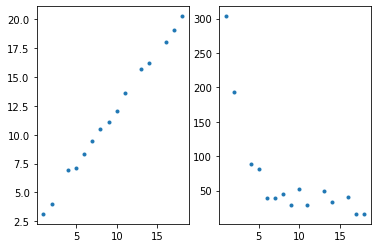

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data7_3.csv')


trnData = data.sample(frac = 0.8,random_state = 0)
testData = data.drop(trnData.index)

plt.subplot(1,2,1)
plt.plot(trnData.t,marker='.',linestyle='none')
plt.subplot(1,2,2)
plt.plot(trnData.c,marker='.',linestyle='none')

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4,activation='relu'),
    layers.Dense(4,activation='relu'),
    layers.Dense(1),
])

In [16]:
# Train ANN model by using Gradient Decent Algorithm, SGD
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), 
              loss = 'mean_absolute_error')


trn_features = trnData.copy()
test_features = testData.copy()

input = trn_features.t
target = trn_features.pop('c')


hist = model.fit(input, target, validation_split = 0.2,verbose = 0, epochs = 100)


In [ ]:
model.weights

1/1 [==============================] - 0s 17ms/step
37.37456


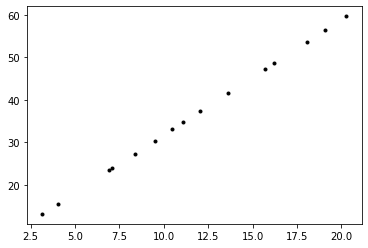

In [24]:
c = model.predict(input).flatten()
print(c[0])

plt.plot(input,c,'k.')